<a href="https://colab.research.google.com/github/HelloJacob11/Data-Analysis/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#"Predicting Loan Default Risk Using Decision Tree Classification on Synthetic Financial Data"

>This project utilizes a synthetic financial dataset derived from real-world patterns to build a binary classification model predicting loan default risk. Using a decision tree algorithm, the model analyzes features such as employment status, bank balance, and annual salary to determine the likelihood of default, offering insights into key financial risk factors.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Dataset

### Dataset Information
#### Kaggle: "Loan Default Prediction"

In [5]:
'''
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kmldas/loan-default-prediction")

print("Path to dataset files:", path)
!mv '/root/.cache/kagglehub/datasets/kmldas/loan-default-prediction/versions/2' '/content/drive/MyDrive/2025 Summer Projects'
'''

'\nimport kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("kmldas/loan-default-prediction")\n\nprint("Path to dataset files:", path)\n!mv \'/root/.cache/kagglehub/datasets/kmldas/loan-default-prediction/versions/2\' \'/content/drive/MyDrive/2025 Summer Projects\'\n'

##1.1 Importing pandas as a data frame

### Data Column
- Index: The serial number or unique identifier of the loan taker
- Employed: This is a Boolean 1= employed 0= unemployed
- Bank Balance: Bank Balance of the loan taker
- Annual Salary: Annual salary of the loan taker
- Defaulted: This is a Boolean 1= defaulted 0= not defaulted

In [6]:
import pandas as pd
dataset=pd.read_csv('/content/drive/MyDrive/2025 Summer Projects/Loan_Data/Default_Fin.csv')
dataset

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


#2. EDA (Exploratory Data Analysis)


##2.1 Creating Boxplots to Analyze Factors that Contribute to Loan Default

### Import: matplotlib and numpy to create a framework for boxplots

#### Creating 2 by 1 grid to plot two different boxplots:
-  Correlation Between Bank Balance and Loan Default
- Correlation between Annual Salary and Loan Default


/tmp/ipython-input-7-3849813745.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(
/tmp/ipython-input-7-3849813745.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


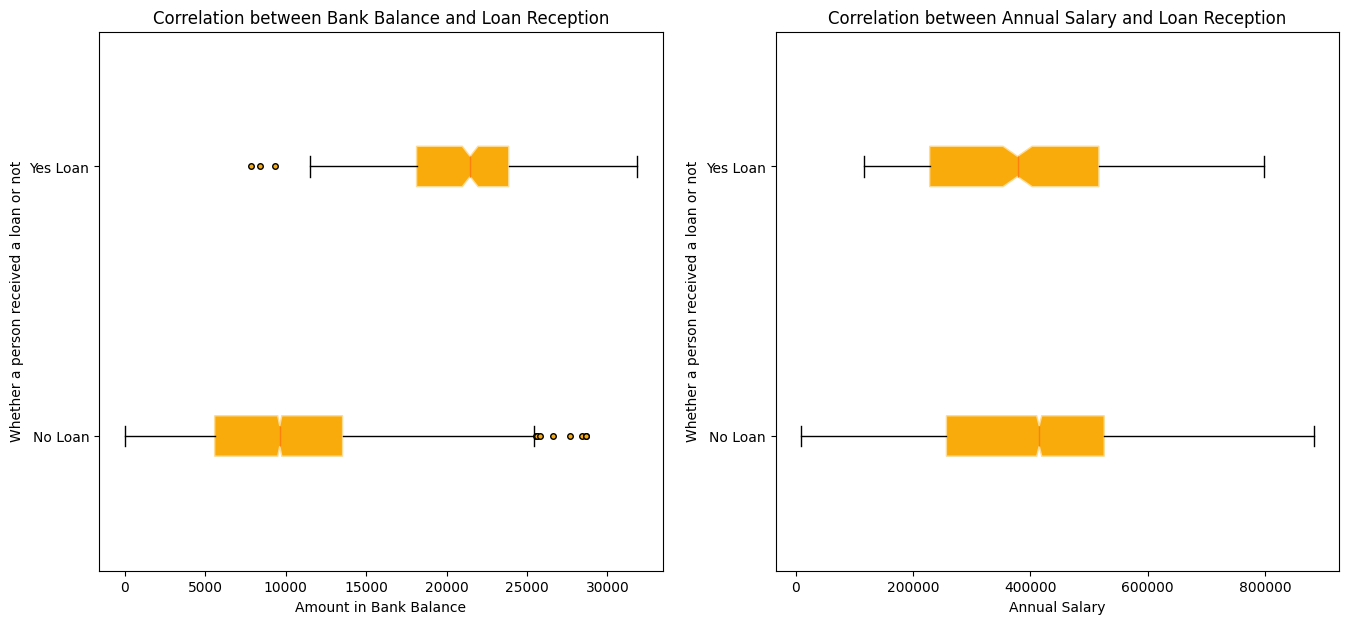

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
g1=dataset[dataset['Defaulted?'] == 0]['Bank Balance']
g2=dataset[dataset['Defaulted?'] == 1]['Bank Balance']
plt.boxplot(
    [g1,g2],
    labels=["No Loan","Yes Loan"],
    vert=False,
    patch_artist=True,
    showfliers=True,
    notch=True,
    boxprops={'facecolor':'#faab0c','color':'#ffdc96'},
    flierprops={'marker':'o','markersize':4,'markerfacecolor':'#faab0c'})
plt.ylabel("Whether a person received a loan or not")
plt.xlabel("Amount in Bank Balance")
plt.title("Correlation between Bank Balance and Loan Reception")


plt.subplot(1,2,2)
g1=dataset[dataset['Defaulted?']==0]['Annual Salary']
g2=dataset[dataset['Defaulted?']==1]['Annual Salary']
plt.boxplot(
    [g1,g2],
    labels=["No Loan","Yes Loan"],
    vert=False,
    patch_artist=True,
    showfliers=True,
    notch=True,
    boxprops={'facecolor':'#faab0c','color':'#ffdc96'},
    flierprops={'marker':'o','markersize':4,'markerfacecolor':'#faab0c'})
plt.xlabel("Annual Salary")
plt.ylabel("Whether a person received a loan or not")
plt.title("Correlation between Annual Salary and Loan Reception")



plt.show()



In [8]:
dataset= dataset.drop(columns=['Index'])
dataset.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


##2.2 Correlation Analysis Between Features

- Correlation values range from -1.0 to 1.0, where values closer to 1.0 indicate a strong positive relationship, and values near -1.0 suggest a strong negative relationship. A correlation of 1.0 occurs when comparing a feature with itself.
- This analysis helps identify the strength and direction of relationships between variables such as employment status, bank balance, annual salary, and loan default status, which may influence model performance.

In [9]:
dataset.corr()

,Employed,Bank Balance,Annual Salary,Defaulted?
Employed,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,0.753985,-0.152243,1.000000,-0.019871
Defaulted?,-0.035420,0.350119,-0.019871,1.000000


##2.3 Generating a Heatmap to Visualize Feature Correlations


### Import: matplotlib and seaborn to create a framework for HeatMap

- To provide an intuitive understanding of the relationships between variables, a heatmap was generated to visualize the correlation matrix. This visual representation uses color intensity to indicate the strength and direction of correlations: deeper red tones represent stronger positive correlations, while deeper blue tones indicate stronger negative correlations. The heatmap allows for quick and clear identification of how features relate to loan default risk.

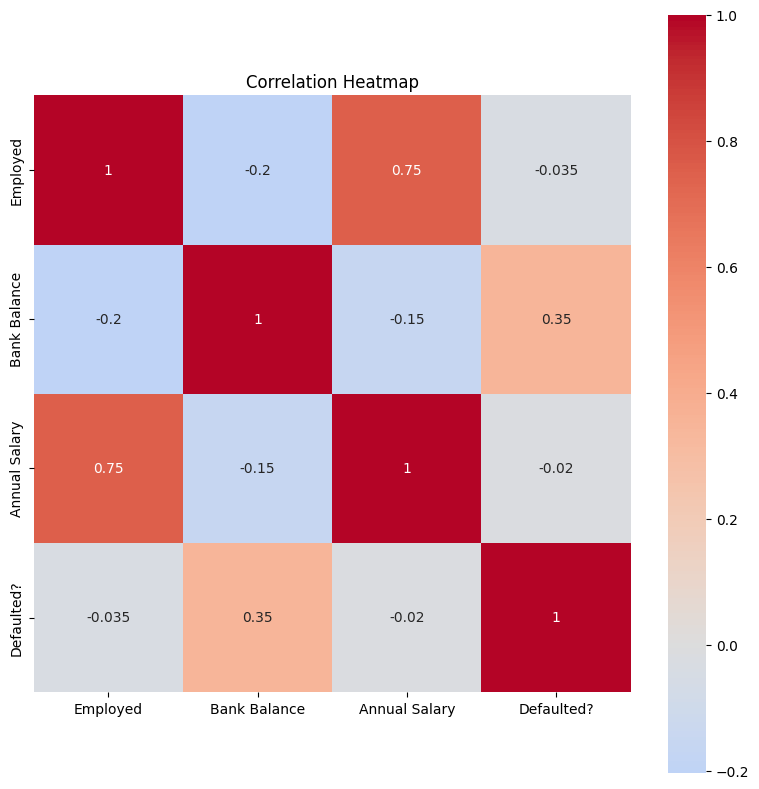

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr=dataset.corr()
plt.figure(figsize=(8,8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

#3. Building ML Model Using Decision Tree Classifier

##3.1 Importing

### Spilting dataset into a training set and a testing set to build the machine learning model
### Library: sklearn

- Import train_test_split to split data into subsets
- x contains the independent variables: Employed, Bank Balance, and Annual Salary
- y contains the dependent variable: Defaulted? that represents whether the person defaulted a loan or not.

#### The dataset is split into two categories: testing dataset and training dataset
- test_size=0.2-> 20% of the dataset for testing and 80% for training
- x_train: 80% of the cleaned reviews designed for training the model
- y_train: corresponding sentiment labels for x_train dataset
- x_test: 20% of the cleaned reviews  kept for testing the model
- y_test: corresponding sentiment labels for x_test dataset
#### A DecisionTreeClassifier has the following parameters:
- random_state=42-> sets a random seed to ensure the split is reproducible
- max_depth=4: limits the depth of the tree to avoding overfitting
- min_samples_leaf=50: ensures each leaft node has at least 50 samples (generalization purpose)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

x=dataset[['Employed','Bank Balance','Annual Salary']]
y=dataset[['Defaulted?']]

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2, random_state=42)

tree= DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=50,
    random_state=42
)
tree.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=42)

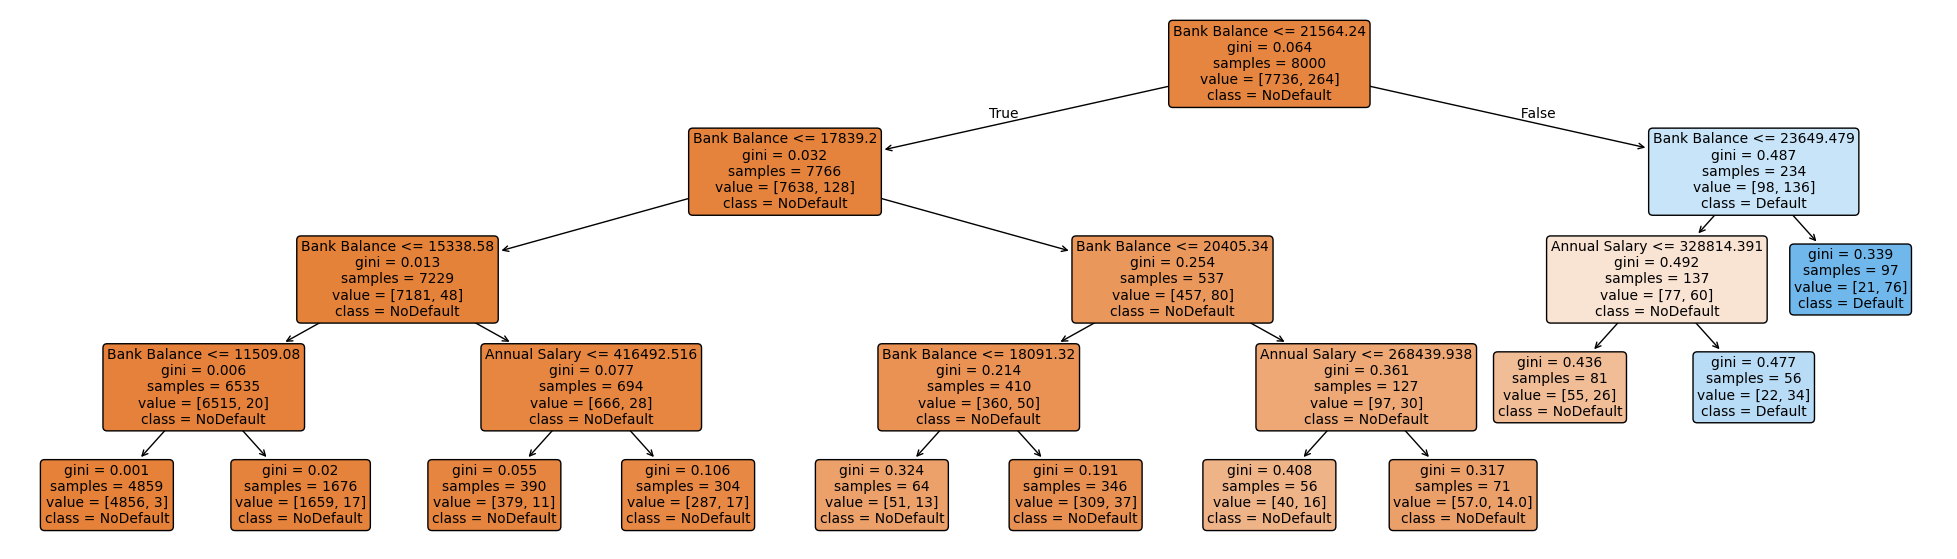

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,7))
plot_tree(
    tree,
    feature_names=x.columns,
    class_names=["NoDefault","Default"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [13]:
y_pred=tree.predict(x_test)
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9756    0.9922    0.9838      1931
           1     0.5833    0.3043    0.4000        69

    accuracy                         0.9685      2000
   macro avg     0.7794    0.6483    0.6919      2000
weighted avg     0.9620    0.9685    0.9637      2000



#4. Evaluating and Recreating Decision Tree Classifier


##4.1 Decision Tree Classifier Analysis

- The Decision Tree Classifier yields an uneven distribution of the dataset; the model tends to classify a disproportionately large number of cases as loan defaults, resulting in a one-sided, heavy decision tree. This imbalance is evidence in the gap between the precision,recall, and f1-score of defaulted versus non-defaulted loan data. Whereas the metrics for the defaulted loan are all close to 1, indicating a high accuracy. However, the corresponding values for non-defaulted loans are comparably low, suggesting that this ML model has certain limitations.

- A common cause for the skewed performance is often attributed to the class imbalance within the dataset. The class ratio in a dataset is crucial when implementing a classification model to ensure that the ML model learns both classes evenly instead of favoring one class over the other. While the overall accuracy stands a a seeminlgy impressive 96.85%, this is misleading because the majority class comprises 96.5% of the dataset (1931 out of 2000).

- It is clear that the model struggles to make meaningful predictions for the minority class. Therefore, I decided to recreate a ML model that eliminates class imbalance within the dataset for a better outcome.

전체 accuracy는 96.85%로 매우 높아 보이지만, 이는 데이터에서 0이 압도적으로 많은 비율(1931/2000 = 약 96.5%)을 차지하기 때문입니다. 모델은 대부분의 샘플을 0이라고 예측해도 높은 정확도를 유지할 수 있습니다. 하지만 연체된 데이터의 예측에 대해서는 정확히 잡아내지 못하고 있습니다.


recall :30.4% 만 1로 제대로 잡아냄 → 10명 중 7명은 연체인데도 놓침
Precision : 1로 예측한 것 중 실제로 맞는 비율도 58% 수준
F1-score : 0.4000 → 매우 낮음 모델이 1을 예측하는 데 실패하고 있음을 의미

In [14]:
Loan_Fail=dataset[dataset['Defaulted?']==0]
Loan_Fail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9667 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       9667 non-null   int64  
 1   Bank Balance   9667 non-null   float64
 2   Annual Salary  9667 non-null   float64
 3   Defaulted?     9667 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 377.6 KB


In [15]:
Loan_Success=dataset[dataset['Defaulted?']==1]
Loan_Success.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 136 to 9978
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       333 non-null    int64  
 1   Bank Balance   333 non-null    float64
 2   Annual Salary  333 non-null    float64
 3   Defaulted?     333 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 13.0 KB


In [16]:
Loan_Fail=Loan_Fail.sample(n=333,random_state=42)
Loan_Fail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 5377 to 8073
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       333 non-null    int64  
 1   Bank Balance   333 non-null    float64
 2   Annual Salary  333 non-null    float64
 3   Defaulted?     333 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 13.0 KB


## 4.2 Creating the New Dataset

- After figuring out that there are 333 defaulted loan data, I created a new dataset that combines 333 of non-defaulted loan data extracted a random seed of 42 and 333 of defaulted loan data in preparation of implementing a new ML model


In [21]:
dataset = pd.concat([Loan_Success,Loan_Fail],axis=0)
dataset

,Employed,Bank Balance,Annual Salary,Defaulted?
136,0,17844.00,214252.80,1
173,0,26469.60,171257.88,1
201,0,21296.28,244314.12,1
206,1,22675.20,587474.04,1
209,0,22792.68,247862.40,1
...,...,...,...,...
7201,1,7862.52,367117.80,0
8470,1,578.88,450436.32,0
2850,1,14481.48,515000.40,0
2777,1,7426.32,447999.96,0


## 4.3 Implementing a New ML Model Using the New Dataset that Ensures Class Balance

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

x=dataset[['Employed','Bank Balance','Annual Salary']]
y=dataset[['Defaulted?']]

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2, random_state=42)

tree= DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=50,
    random_state=42
)
tree.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=42)

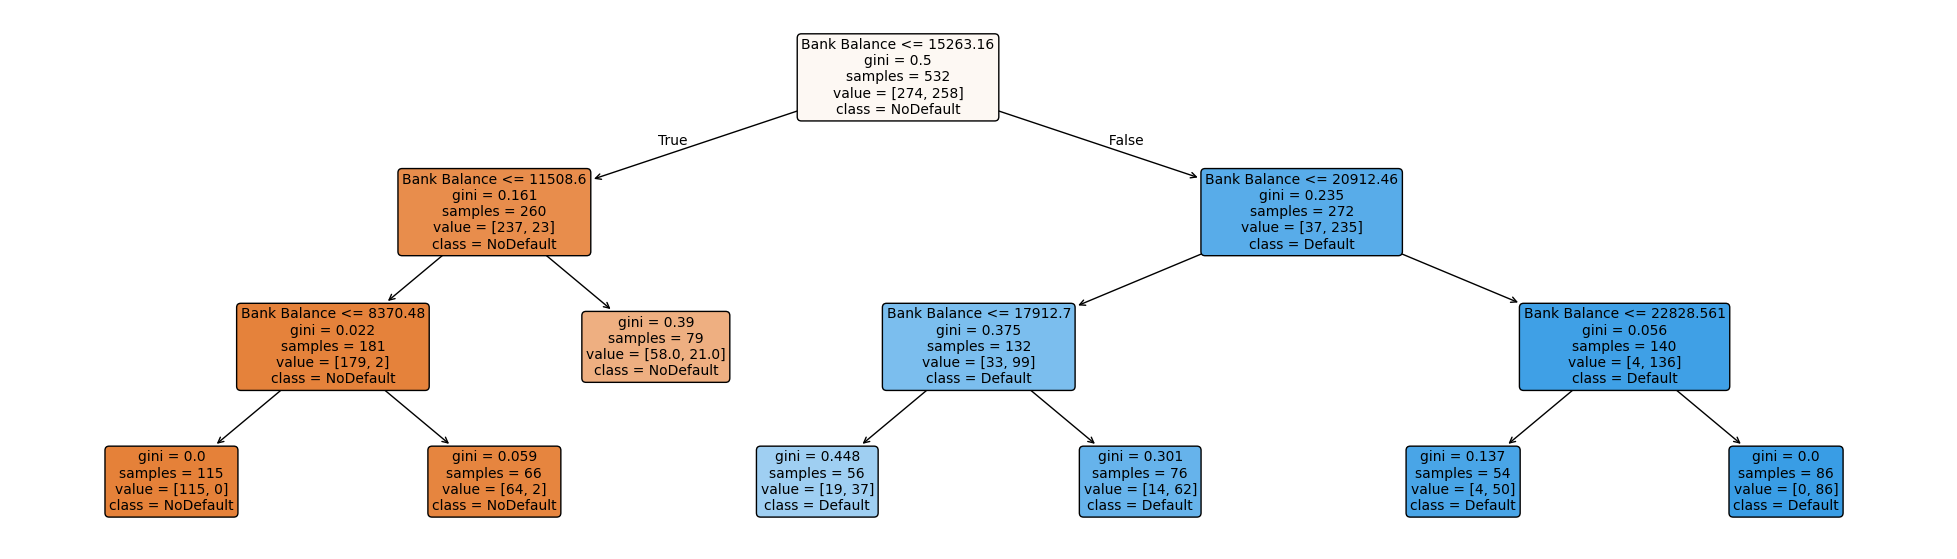

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,7))
plot_tree(
    tree,
    feature_names=x.columns,
    class_names=["NoDefault","Default"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [20]:
y_pred=tree.predict(x_test)
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9184    0.7627    0.8333        59
           1     0.8353    0.9467    0.8875        75

    accuracy                         0.8657       134
   macro avg     0.8768    0.8547    0.8604       134
weighted avg     0.8719    0.8657    0.8637       134

